        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0   
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


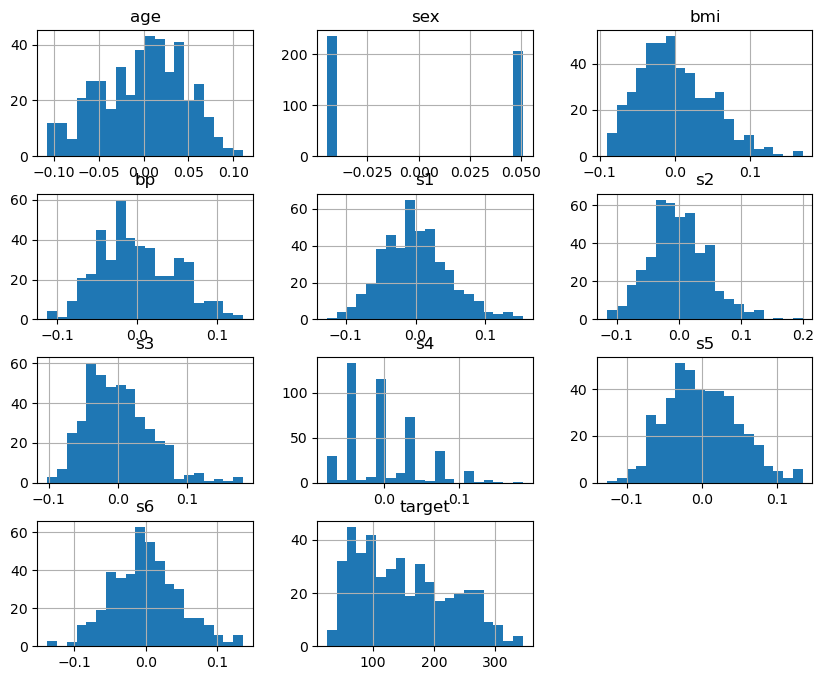

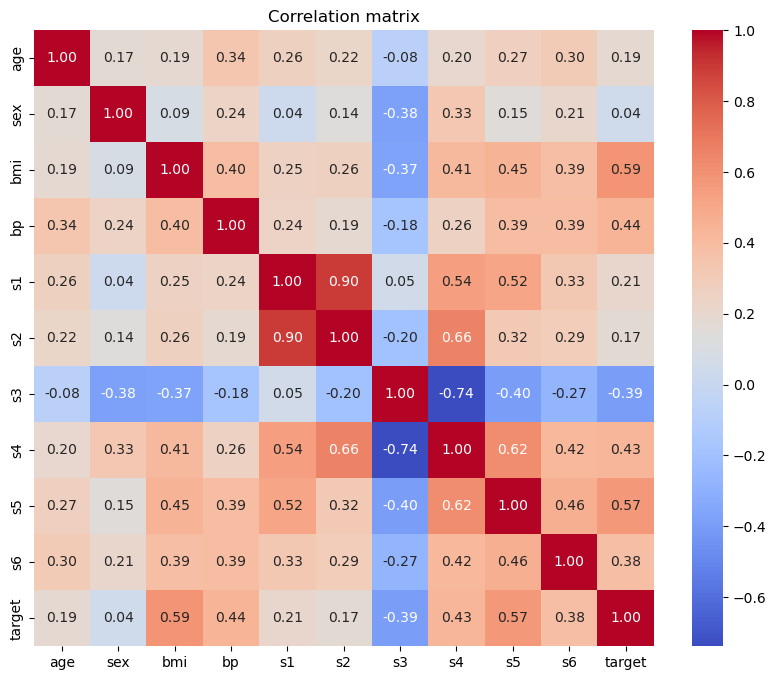

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
X = df.drop(columns=["target"])
y = df["target"]

print(df.head(),'\n', df.isnull().sum())

df.hist(figsize=(10, 8), bins=20)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()



In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def visualize_best_model(func, mod, model_name=None):
    if model_name:  
        best_degree = func(mod, model_name)
        best_model = make_pipeline(PolynomialFeatures(best_degree), mod())
        title = f"Real vs Predicted values ({model_name}, degree={best_degree})"
    else:  
        best_alpha = func(mod)
        best_model = mod(alpha=best_alpha)
        title = f"Real vs Predicted values ({mod.__name__} regression, λ={best_alpha})"
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual values", alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred, color="red", label="Predicted values", alpha=0.6)
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()
    plt.show()
    
    return 

Best alpha for Ridge: 0.001


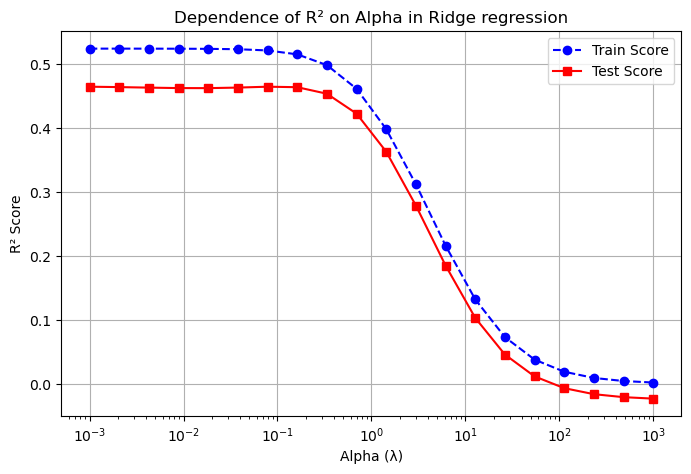

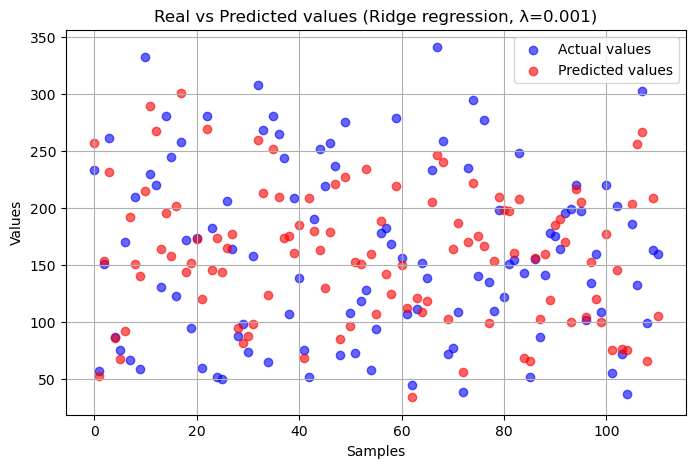

Best alpha for Lasso: 0.1623776739188721


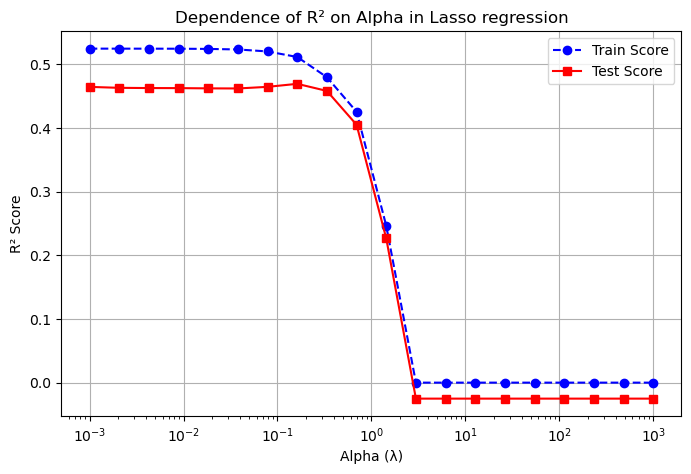

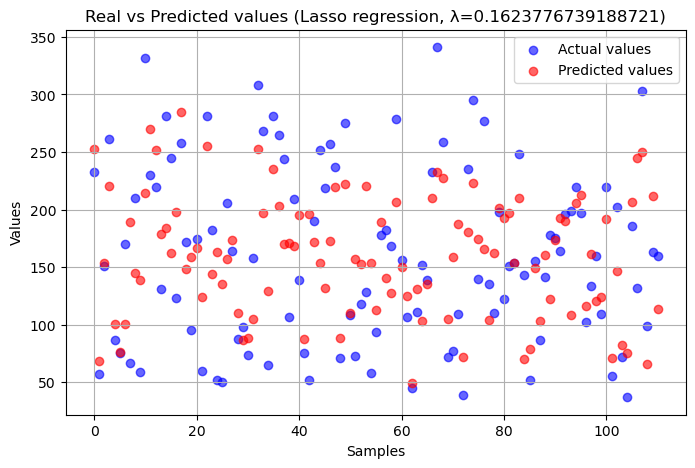

In [34]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression


def best_model_score(mod):
    alphas = np.logspace(-3, 3, 20)
    scores_dict = {}

    for alpha in alphas:
        model = mod(alpha=alpha)
        model.fit(X_train, y_train)
        train_r2 = model.score(X_train, y_train)
        test_r2 = model.score(X_test, y_test)
        scores_dict[alpha] = (train_r2, test_r2)
        
    best_alpha = max(scores_dict, key=lambda a: scores_dict[a][1])  
    print(f"Best alpha for {mod.__name__}: {best_alpha}")  
    plt.figure(figsize=(8, 5))
    plt.plot(alphas, [scores_dict[a][0] for a in alphas], label="Train Score", marker='o', linestyle="--", color="b")
    plt.plot(alphas, [scores_dict[a][1] for a in alphas], label="Test Score", marker='s', linestyle="-", color="r")
    plt.xscale("log")
    plt.xlabel("Alpha (λ)")
    plt.ylabel("R² Score")
    plt.title(f"Dependence of R² on Alpha in {mod.__name__} regression")
    plt.legend()
    plt.grid()
    plt.show()
    
    return best_alpha


visualize_best_model(best_model_score, Ridge)
visualize_best_model(best_model_score, Lasso)

{1: (0.5246407428384183, 0.46587053131560263), 2: (0.6215621099557788, 0.30691504586767815), 3: (0.9188656694391266, -113.92547778490136), 4: (1.0, -57.126927282103054), 5: (1.0, -53.87873590141756), 6: (1.0, -53.854046795100935), 7: (1.0, -53.85318582769768), 8: (1.0, -53.85315617647687), 9: (1.0, -53.85315501226387)}
The best polynomial degree for Polynomial + LinearRegression: 1 with a R² score of 0.46587053131560263


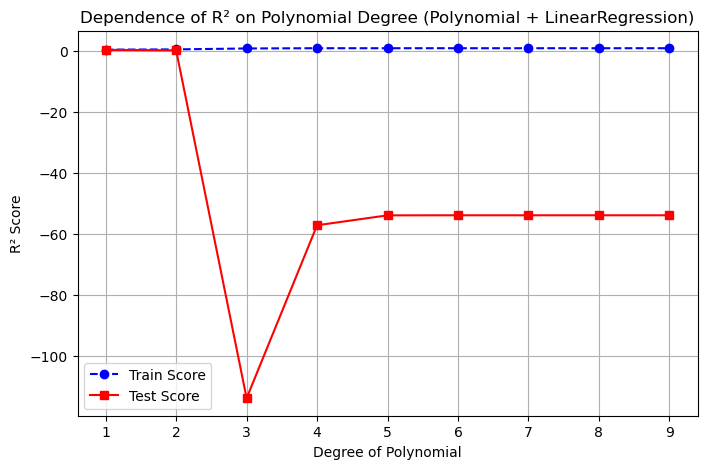

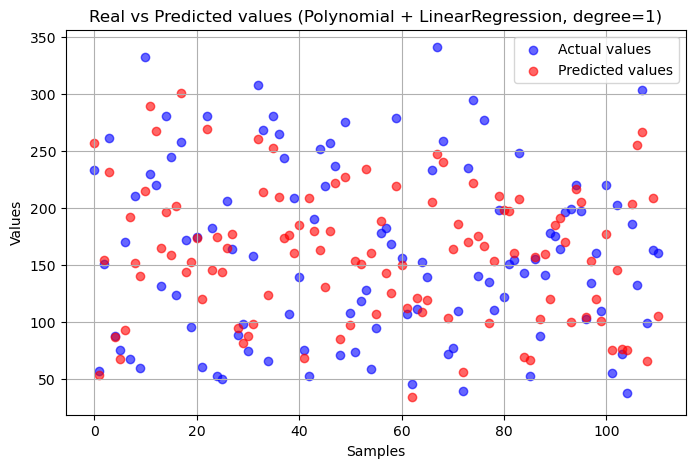

{1: (0.4335658801578265, 0.3967412764973939), 2: (0.4342204273541723, 0.3972069572208845), 3: (0.4342322143535535, 0.3972169461495585), 4: (0.4342325965757967, 0.39721699262680266), 5: (0.4342326105309938, 0.39721699259378473), 6: (0.4342326112315328, 0.39721699248427245), 7: (0.4342326112618219, 0.3972169924792397), 8: (0.434232611263191, 0.3972169924789839), 9: (0.4342326112632491, 0.39721699247897335)}
The best polynomial degree for Polynomial + Ridge: 1 with a R² score of 0.3967412764973939


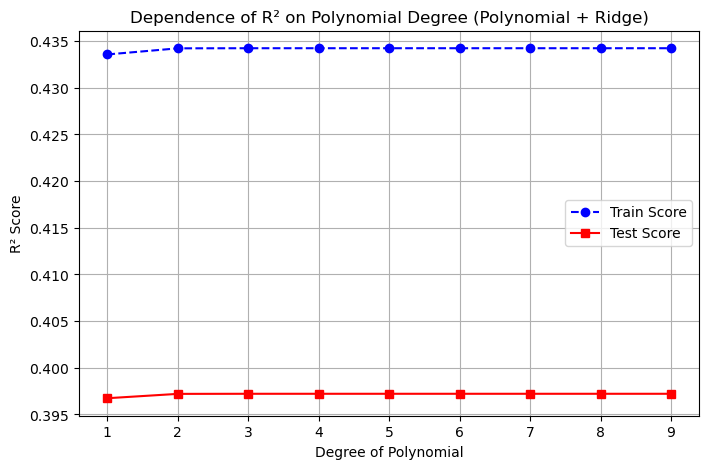

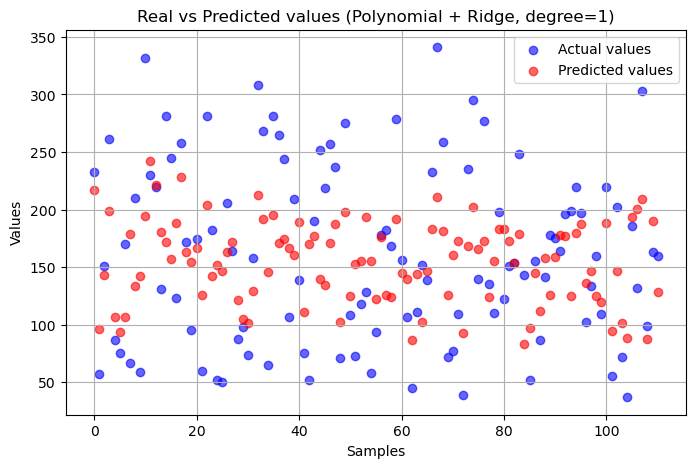

{1: (0.36170821585162183, 0.3436455090171021), 2: (0.36170821585162183, 0.3436455090171021), 3: (0.36170821585162183, 0.3436455090171021), 4: (0.36170821585162183, 0.3436455090171021), 5: (0.36170821585162183, 0.3436455090171021), 6: (0.36170821585162183, 0.3436455090171021), 7: (0.36170821585162183, 0.3436455090171021), 8: (0.36170821585162183, 0.3436455090171021), 9: (0.36170821585162183, 0.3436455090171021)}
The best polynomial degree for Polynomial + Lasso: 1 with a R² score of 0.3436455090171021


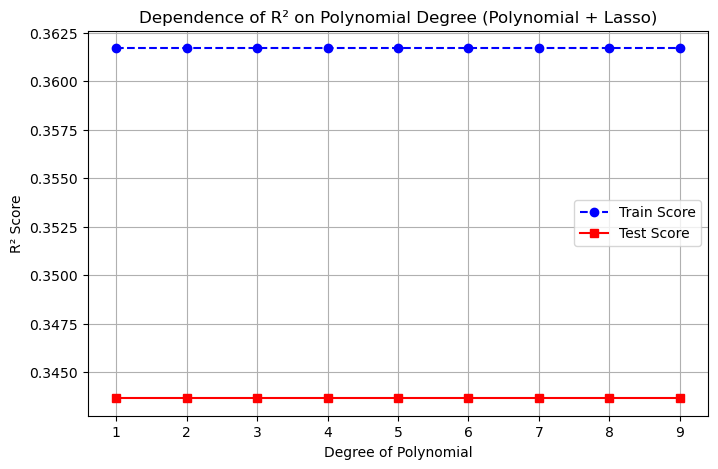

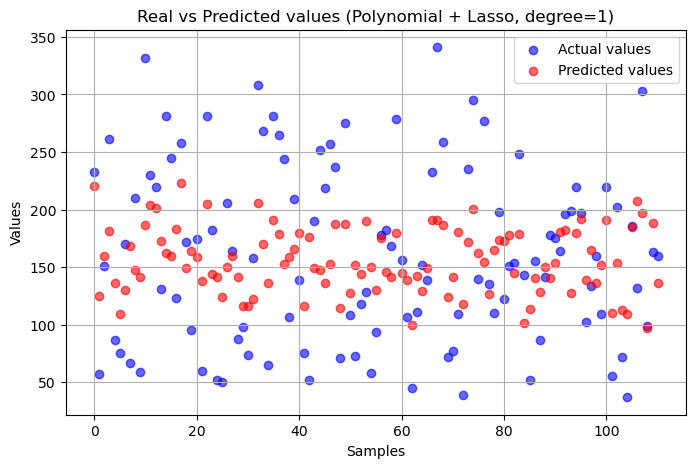

In [35]:
def find_best_degree(model_poly, model_name):
    degree_range = range(1, 10)
    r2_scores = {}

    for degree in degree_range:
        model = make_pipeline(PolynomialFeatures(degree), model_poly())
        model.fit(X_train, y_train)
        train_r2 = model.score(X_train, y_train)
        test_r2 = model.score(X_test, y_test)
        r2_scores[degree] = (train_r2, test_r2)

    print(r2_scores)
    best_degree = degree_range[np.argmax(r2_scores)]
    best_score = r2_scores[best_degree][1]
    print(f"The best polynomial degree for {model_name}: {best_degree} with a R² score of {best_score}")
    plt.figure(figsize=(8, 5))
    plt.plot(degree_range, [r2_scores[d][0] for d in degree_range], label="Train Score", marker='o', linestyle="--", color="b")
    plt.plot(degree_range, [r2_scores[d][1] for d in degree_range], label="Test Score", marker='s', linestyle="-", color="r")
    plt.xlabel("Degree of Polynomial")
    plt.ylabel("R² Score")
    plt.title(f"Dependence of R² on Polynomial Degree ({model_name})")
    plt.legend()
    plt.grid()
    plt.show()

    return best_degree
    
    
visualize_best_model(find_best_degree, LinearRegression, model_name="Polynomial + LinearRegression")
visualize_best_model(find_best_degree, Ridge, model_name="Polynomial + Ridge")
visualize_best_model(find_best_degree, Lasso, model_name="Polynomial + Lasso")
